## Background:

- Dataset Information

The NHANES dataset was created to assess the health and nutritional status of adults and children in the United States. This dataset is funded by the Centers for Disease Control and Prevention (CDC), specifically through its National Center for Health Statistics (NCHS). The data is based on the survey respondents throughout the United States. Data was gathered through interviews, physical examinations, and laboratory tests. For this subset respondents 65 years old and older were labeled as “senior” and all individuals under 65 years old as “non-senior.”

### Task:

As a data analyst, your task is to prepare and analyse the data set using appropriate data preparation and apply the machine learning models for the specified tasks. Your analysis should aim to identify any relationships or trends in the data. Recognise suitable independent variables and target variable from the dataset to justify your classification/ prediction tasks. You can perform clustering on the dataset based on your analysis if applicable. You can generate synthetic data or use any additional data to support your machine learning models if required.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder

### Dataset dictionary

- SEQN: ID, Respondent Sequence Number.
- age_group: Respondent's Age Group (senior (65 or older)/non-senior).
- RIDAGEYR: Respondent's Age.
- RIAGENDR: Respondent's Gender, a 1 represents Male and 2 represents Female.
- PAQ605: A 1 represents that the respondent takes part in weekly moderate or vigorous-intensity physical activity and a 2 represents that they do not.
- BMXBMI: Respondent's Body Mass Index.
- LBXGLU: Respondent's Blood Glucose after fasting.
- DIQ010: If the Respondent is diabetic, 1:yes, 2:no, 3:borderline.
- LBXGLT: Respondent's Glucose value.
- LBXIN: Respondent's Blood Insulin Levels.

In [2]:
df = pd.read_csv('NHANES_age_prediction.csv')
df.head(-5)

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...,...
2268,83692.0,Senior,68.0,1.0,2.0,19.1,89.0,2.0,136.0,1.56
2269,83694.0,Adult,36.0,2.0,2.0,25.3,99.0,2.0,128.0,20.72
2270,83699.0,Adult,37.0,2.0,2.0,20.8,83.0,2.0,113.0,1.93
2271,83702.0,Senior,80.0,2.0,2.0,27.9,111.0,2.0,72.0,13.91


In [3]:
df.shape

(2278, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [5]:
df.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [6]:
df.isnull().mean()*100 # Porcentage of missing data on each column.

SEQN         0.0
age_group    0.0
RIDAGEYR     0.0
RIAGENDR     0.0
PAQ605       0.0
BMXBMI       0.0
LBXGLU       0.0
DIQ010       0.0
LBXGLT       0.0
LBXIN        0.0
dtype: float64

In [7]:
df['age_group'].unique()

array(['Adult', 'Senior'], dtype=object)

In [8]:
oh = OneHotEncoder()
oh.fit_transform(df[['DIQ010']]).toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [9]:
diabetic = pd.DataFrame(oh.fit_transform(df[['DIQ010']]).toarray(), columns = df.DIQ010.unique())
diabetic.head()

,2.0,1.0,3.0
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [10]:
diabetic.rename(columns={2.0:'no_diabetic', 1.0:'diabetic', 3.0:'borderline_diabetic'}, inplace=True)
diabetic.head()

,no_diabetic,diabetic,borderline_diabetic
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [11]:
diabetic.shape

(2278, 3)

In [12]:
df = pd.concat([df, diabetic], join='outer', axis=1)
df.head(-5)

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,no_diabetic,diabetic,borderline_diabetic
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,0.0,1.0,0.0
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,0.0,1.0,0.0
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,0.0,1.0,0.0
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15,0.0,1.0,0.0
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,83692.0,Senior,68.0,1.0,2.0,19.1,89.0,2.0,136.0,1.56,0.0,1.0,0.0
2269,83694.0,Adult,36.0,2.0,2.0,25.3,99.0,2.0,128.0,20.72,0.0,1.0,0.0
2270,83699.0,Adult,37.0,2.0,2.0,20.8,83.0,2.0,113.0,1.93,0.0,1.0,0.0
2271,83702.0,Senior,80.0,2.0,2.0,27.9,111.0,2.0,72.0,13.91,0.0,1.0,0.0


In [13]:
df['gender'] = df['RIAGENDR'].replace([1, 2], [0, 1]) # 0:Male , 1:Female
df['exercise'] = df['PAQ605'].replace([2, 1], [0, 1]) # 0:No exercise, 1:Exercise
df['senior'] = df['age_group'].replace(['Adult', 'Senior'], [0, 1]) # 0:Adult, 1:Senior

df.head(-5)

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,no_diabetic,diabetic,borderline_diabetic,gender,exercise,senior
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,0.0,1.0,0.0,1.0,0.0,0
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,0.0,1.0,0.0,1.0,0.0,0
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,0.0,1.0,0.0,0.0,0.0,0
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15,0.0,1.0,0.0,0.0,0.0,0
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,0.0,1.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,83692.0,Senior,68.0,1.0,2.0,19.1,89.0,2.0,136.0,1.56,0.0,1.0,0.0,0.0,0.0,1
2269,83694.0,Adult,36.0,2.0,2.0,25.3,99.0,2.0,128.0,20.72,0.0,1.0,0.0,1.0,0.0,0
2270,83699.0,Adult,37.0,2.0,2.0,20.8,83.0,2.0,113.0,1.93,0.0,1.0,0.0,1.0,0.0,0
2271,83702.0,Senior,80.0,2.0,2.0,27.9,111.0,2.0,72.0,13.91,0.0,1.0,0.0,1.0,0.0,1


In [14]:
df.drop(columns='DIQ010', inplace=True) # We now have 3 columns that hold the data from this column, we can drop this column.
df.drop(columns='SEQN', inplace=True) # We do not need this feature since is an ID, has no value for the analysis.
df.drop(columns='age_group', inplace=True) # Since we have our target column ('senior'), we can drop this column.
df.drop(columns='RIDAGEYR', inplace=True) # We need to drop this columns due to it holds the target value in a numeric form.
df.drop(columns='RIAGENDR', inplace=True) #Since we now have an encoded gender feature with 0 and 1, we can drop this column.
df.drop(columns='PAQ605', inplace=True) # We have a new column with this data representen with 0 and 1, we can drio this column.
df.head(-5)

,BMXBMI,LBXGLU,LBXGLT,LBXIN,no_diabetic,diabetic,borderline_diabetic,gender,exercise,senior
0,35.7,110.0,150.0,14.91,0.0,1.0,0.0,1.0,0.0,0
1,20.3,89.0,80.0,3.85,0.0,1.0,0.0,1.0,0.0,0
2,23.2,89.0,68.0,6.14,0.0,1.0,0.0,0.0,0.0,0
3,28.9,104.0,84.0,16.15,0.0,1.0,0.0,0.0,0.0,0
4,35.9,103.0,81.0,10.92,0.0,1.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
2268,19.1,89.0,136.0,1.56,0.0,1.0,0.0,0.0,0.0,1
2269,25.3,99.0,128.0,20.72,0.0,1.0,0.0,1.0,0.0,0
2270,20.8,83.0,113.0,1.93,0.0,1.0,0.0,1.0,0.0,0
2271,27.9,111.0,72.0,13.91,0.0,1.0,0.0,1.0,0.0,1


In [15]:
df.rename(columns={'BMXBMI':'body_mass_index', 'LBXGLU':'glucose_after_fasting', 'LBXGLT':'glucose_value','LBXIN':'insulin_level'}, inplace=True)
df.head()

,body_mass_index,glucose_after_fasting,glucose_value,insulin_level,no_diabetic,diabetic,borderline_diabetic,gender,exercise,senior
0,35.7,110.0,150.0,14.91,0.0,1.0,0.0,1.0,0.0,0
1,20.3,89.0,80.0,3.85,0.0,1.0,0.0,1.0,0.0,0
2,23.2,89.0,68.0,6.14,0.0,1.0,0.0,0.0,0.0,0
3,28.9,104.0,84.0,16.15,0.0,1.0,0.0,0.0,0.0,0
4,35.9,103.0,81.0,10.92,0.0,1.0,0.0,1.0,1.0,0


In [16]:
df['no_diabetic'] = df['no_diabetic'].astype(int)
df['diabetic'] = df['diabetic'].astype(int)
df['borderline_diabetic'] = df['borderline_diabetic'].astype(int)
df['gender'] = df['gender'].astype(int)
df['exercise'] = df['exercise'].astype(int)
df.dtypes

body_mass_index          float64
glucose_after_fasting    float64
glucose_value            float64
insulin_level            float64
no_diabetic                int32
diabetic                   int32
borderline_diabetic        int32
gender                     int32
exercise                   int32
senior                     int64
dtype: object

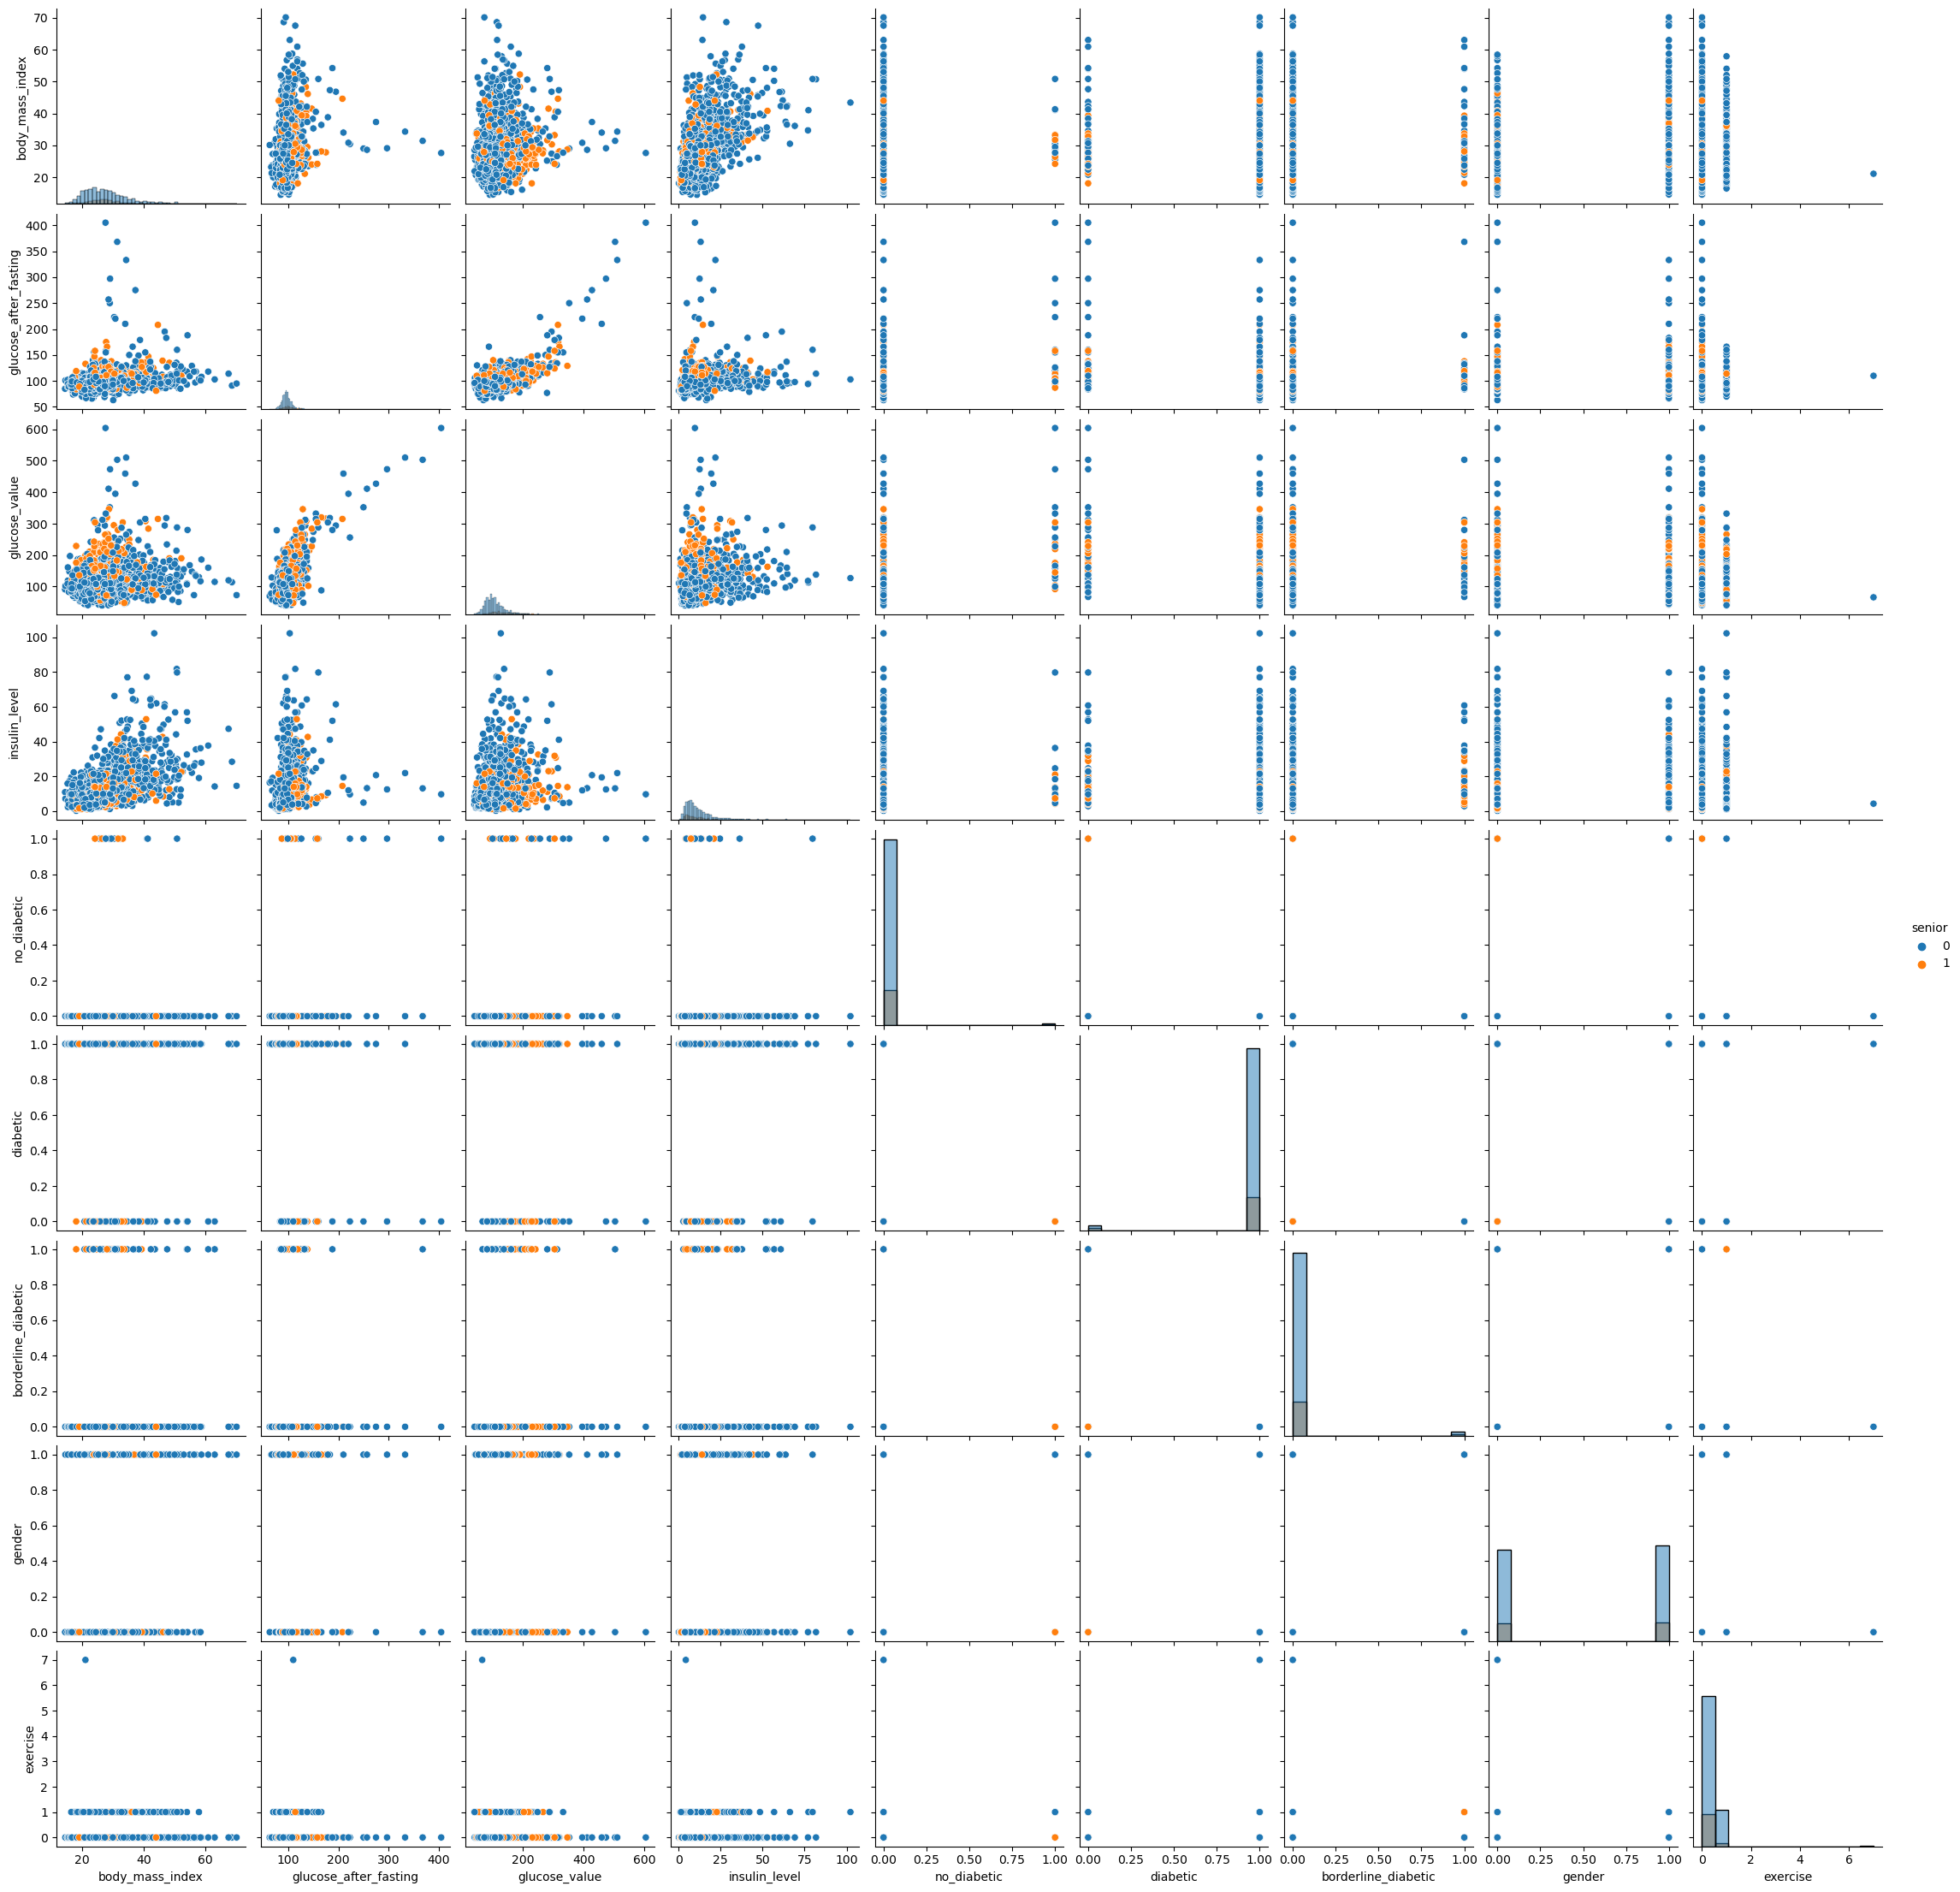

In [56]:
sns.pairplot(data=df, hue='senior', diag_kind='hist')

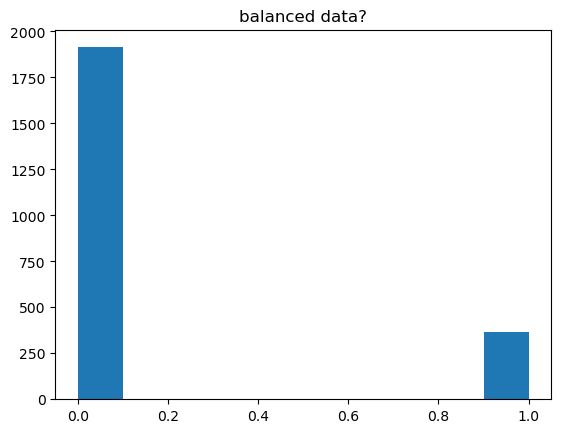

In [24]:
plt.hist(df['senior']);
plt.title('balanced data?')
plt.show()

In [40]:
df.groupby('senior').size()

senior
0    1914
1     364
dtype: int64

In [53]:
proportions = ((df.groupby('senior').size())/df['senior'].count()*100) # Percentage of each group, if senior or not.
proportions

senior
0    84.021071
1    15.978929
dtype: float64

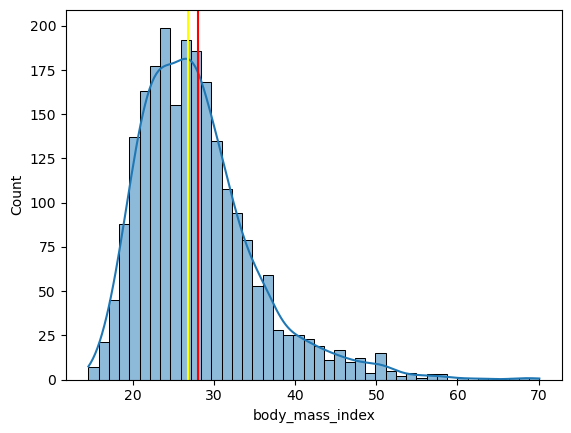

In [70]:
# Distribution of our numeric features

sns.histplot(data=df, x='body_mass_index', kde=True)
plt.axvline(x=df.body_mass_index.mean(), color='red') # Mean value of the body_mass_index feature
plt.axvline(x=df.body_mass_index.median(), color='yellow') # Median value of the body_mass_index feature

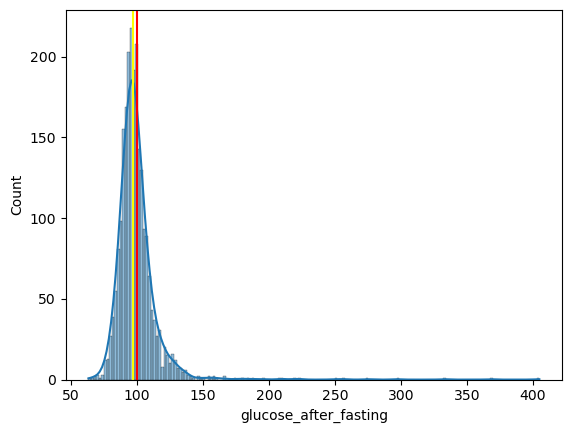

In [71]:
sns.histplot(data=df, x='glucose_after_fasting', kde=True)
plt.axvline(x=df.glucose_after_fasting.mean(), color='red') # Mean value of the glucose_after_fasting feature
plt.axvline(x=df.glucose_after_fasting.median(), color='yellow') # Median value of the glucose_after_fasting feature

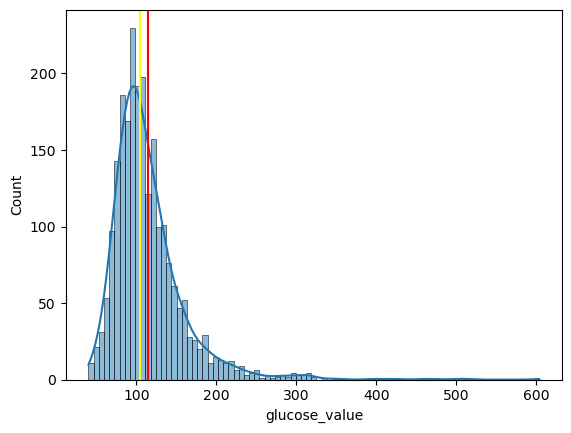

In [72]:
sns.histplot(data=df, x='glucose_value', kde=True)
plt.axvline(x=df.glucose_value.mean(), color='red') # Mean value of the glucose_value feature
plt.axvline(x=df.glucose_value.median(), color='yellow') # Median value of the glucose_value feature

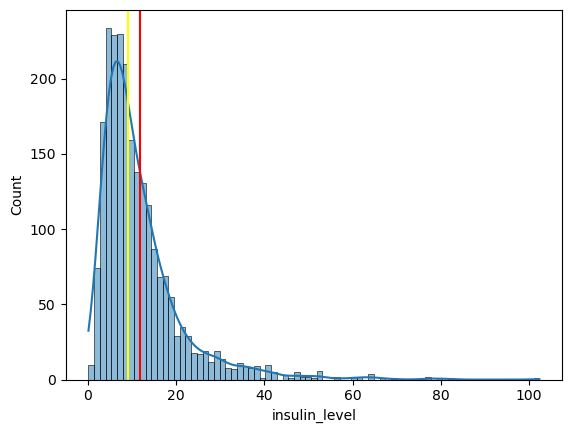

In [73]:
sns.histplot(data=df, x='insulin_level', kde=True)
plt.axvline(x=df.insulin_level.mean(), color='red') # Mean value of the insulin_level feature
plt.axvline(x=df.insulin_level.median(), color='yellow') # Median value of the insulin_level feature